In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os

In [8]:
# Parameters for matplotlib (these should be the same as the ones used for SHD)
fontsize = 20
matplotlib.rcParams.update({
    "font.size": fontsize,
    "axes.titlesize": fontsize,
    "axes.labelsize": fontsize, #* 2,
    "xtick.labelsize": fontsize,
    "ytick.labelsize": fontsize,
    "xtick.major.size": fontsize * .8,
    "ytick.major.size": fontsize * .8,
    "legend.fontsize": fontsize-5,
    #"font.family": "Times new Roman",
    "figure.dpi": 100,
    "savefig.dpi": 300,
    #"text.usetex": True,
    "path.simplify": True,
    "figure.figsize": (10, 6)
})

plt.rcParams["figure.facecolor"] = "w"


# Class to deal in an easy way with number of digits in colorbars (used for ULs and sigma maps)
class FormatScalarFormatter(matplotlib.ticker.ScalarFormatter):
            def __init__(self, fformat="%1.1f", offset=True, mathText=True):
                self.fformat = fformat
                matplotlib.ticker.ScalarFormatter.__init__(self,useOffset=offset,
                                                        useMathText=mathText)
            def _set_format(self):
                self.format = self.fformat
                if self._useMathText:
                    #self.format = '$%s$' % matplotlib.ticker._mathdefault(self.format)
                    self.format = '$%s$' % ('\\mathdefault{%s}' % self.format)

In [9]:
alex_pi_curves = "./Alex_Jenkins_PI_curves_arXiv_2202.00178/"
file_list = os.listdir(alex_pi_curves)
file_dict = {file[:-4]: alex_pi_curves+file for file in file_list}
detector_list =['planck', 'SKA','LVC-O3','ET', 'AION','A+',\
                'cassini', 'normal-modes', 'LISA', 'binary-resonance','PPTA']

In [10]:
detector_labels = {'planck':"Planck", 'SKA':"SKA",'LVC-O3': "LVK O3",'ET': "ET",\
                   'AION': "AION",'A+':"A+", 'cassini':"Cassini", 'normal-modes':"Earth's normal modes",\
                   'LISA': "LISA", 'binary-resonance': "Binary resonance",'PPTA': "PPTA"}
detector_colors = {'planck':"aqua", 'SKA':"orange",'LVC-O3': "black",'ET': "green",\
                  'AION': "hotpink",'A+':"black", 'cassini':"firebrick", 'normal-modes':"darkviolet",\
                  'LISA': "blue", 'binary-resonance': "red",'PPTA': "orange"}

detector_linestyles = {'planck':"solid", 'SKA':"dashed",'LVC-O3': "solid",'ET': "dotted",\
                   'AION': "dashed",'A+':"dashed", 'cassini':"solid", 'normal-modes':"solid",\
                   'LISA': "dashed", 'binary-resonance': "dashed",'PPTA': "solid"}

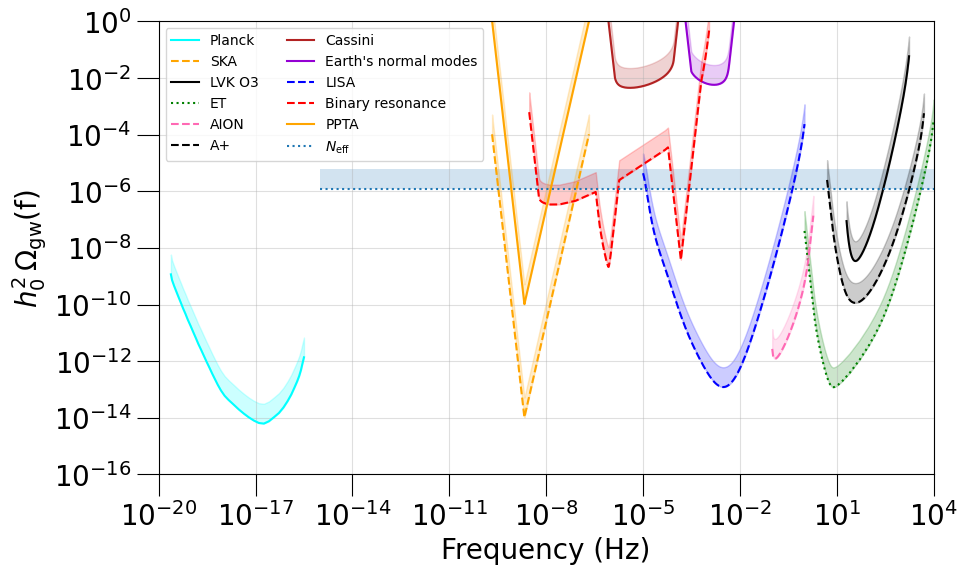

In [12]:
h0=0.6766

for k in detector_list:
    f, Om = np.transpose(np.loadtxt(file_dict[k], skiprows=1))
    plt.loglog(f, h0**2*Om, label = detector_labels[k], color = detector_colors[k], linestyle=detector_linestyles[k])
    plt.fill_between(f, h0**2*Om, h0**2*Om*5, color = detector_colors[k], alpha =0.2)
    
plt.plot(np.logspace(-15, 4, 20), [1.2e-6]*20, label = r"$N_{\rm eff}$", linestyle = "dotted")
plt.fill_between(np.logspace(-15, 4, 20), [1.2e-6]*20, [1.2e-6*5]*20, alpha = 0.2, zorder=0)
plt.xlim(1e-20, 1e4)
plt.ylim(1e-16,1)
plt.yticks(np.logspace(-16,0,9))

plt.xlabel("Frequency (Hz)")
plt.ylabel(r"$h_{0}^{2}\,\Omega_{\rm gw}$(f)")
plt.grid(alpha = 0.4)
#plt.legend(ncol = 1, bbox_to_anchor = (1.55, 0.5), loc = "center right")
plt.legend(ncol = 2, loc = "upper left", fontsize = 10)
plt.savefig("./Bound_SGWB_landscape.pdf", bbox_inches = "tight")
plt.show()